<a href="https://colab.research.google.com/github/mmovahed/Spectral_Methods/blob/main/IE/Collocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collocation weighted residual method

Consider the Fredholm integral equation:

$u(x)=e^{x} - x + \int_{0}^{1} xtu(t)$


Collocation points: [0.         0.00502513 0.01005025 0.01507538 0.0201005  0.02512563
 0.03015075 0.03517588 0.04020101 0.04522613 0.05025126 0.05527638
 0.06030151 0.06532663 0.07035176 0.07537688 0.08040201 0.08542714
 0.09045226 0.09547739 0.10050251 0.10552764 0.11055276 0.11557789
 0.12060302 0.12562814 0.13065327 0.13567839 0.14070352 0.14572864
 0.15075377 0.15577889 0.16080402 0.16582915 0.17085427 0.1758794
 0.18090452 0.18592965 0.19095477 0.1959799  0.20100503 0.20603015
 0.21105528 0.2160804  0.22110553 0.22613065 0.23115578 0.2361809
 0.24120603 0.24623116 0.25125628 0.25628141 0.26130653 0.26633166
 0.27135678 0.27638191 0.28140704 0.28643216 0.29145729 0.29648241
 0.30150754 0.30653266 0.31155779 0.31658291 0.32160804 0.32663317
 0.33165829 0.33668342 0.34170854 0.34673367 0.35175879 0.35678392
 0.36180905 0.36683417 0.3718593  0.37688442 0.38190955 0.38693467
 0.3919598  0.39698492 0.40201005 0.40703518 0.4120603  0.41708543
 0.42211055 0.42713568 0.4321608  0.43718593

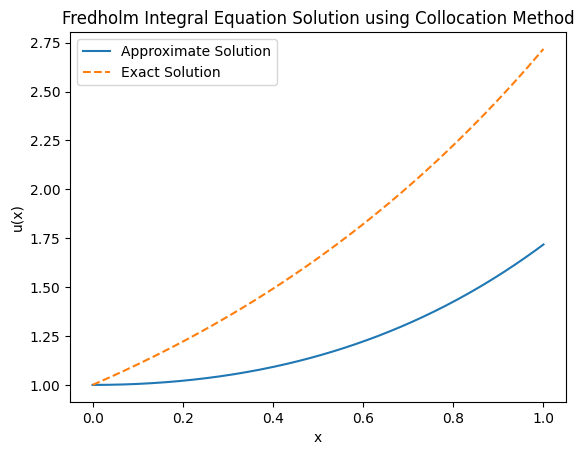

In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.linalg import solve

# Define the number of collocation points
N = 200
collocation_points = np.linspace(0, 1, N)

# Define the known part of the equation u(x) = e^x - x
def known_part(x):
    return np.exp(x) - x

# Define the integral kernel K(x, t) = x * t
def kernel(x, t):
    return x * t


def exact(x):
    return np.exp(x)

# Create the matrix and right-hand side
A = np.zeros((N, N))
b = np.zeros(N)

# Construct the matrix A and vector b
for i, x in enumerate(collocation_points):
    b[i] = known_part(x)
    for j, t in enumerate(collocation_points):
        integral_value, _ = quad(lambda tau: kernel(x, tau) * (tau == t), 0, 1)
        A[i, j] = integral_value

# Solve the system of linear equations
u = solve(np.eye(N) - A, b)

# Define the approximate solution using piecewise linear basis functions
def u_approx(x):
    return np.interp(x, collocation_points, u)

# Print the collocation points and the approximate solution at those points
print("Collocation points:", collocation_points)
print("Approximate solution at collocation points:", u)
u_ex = exact(collocation_points)
print("Exact u values:", u_ex)
print("MAE:", np.abs(u_ex-u).mean())
# Plot the approximate solution
import matplotlib.pyplot as plt

plt.plot(collocation_points, u, label='Approximate Solution')
plt.plot(collocation_points, u_ex, label='Exact Solution', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Fredholm Integral Equation Solution using Collocation Method')
plt.show()
